### Data loading

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()

In [3]:
((X_train, y_train), (X_test, y_test)) = data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


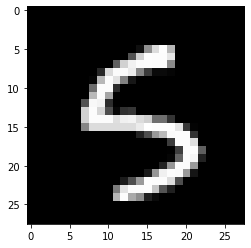

In [5]:
plt.imshow(X_train[15000], cmap= 'gray')

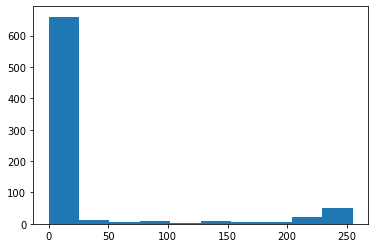

In [7]:
plt.hist(X_train[15000].reshape(-1))
plt.show()

In [9]:
import numpy as np
import pandas as pd

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape[0]

60000

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_reshape.shape, X_test_reshape.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
X_train_reshape[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

### one hot

In [12]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [13]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [11]:
import numpy as np
import tensorflow

np.random.seed(0)
tensorflow.random.set_seed(0)

### 모델 생성

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
model = Sequential()

# CNN 망을 추가 --> 특성 추출해서 요약
# Conv2D() : 컨볼루션 수행
# MaxPooling2D() : 이미지 크기 축소
# Flatten() : 다차원 데이터를 1차원으로 변환
# Dropout() : 과대적합을 방지하기 위해 사용되는 노드를 제한 (0.5 이하)
# padding : 컨볼루션 후에 이미지 크기가 줄어드는 것을 방지 (외곽을 0으로 채움!)
# stride : 필터를 몇 픽셀씩 이동할 것인지 설정

model.add(Conv2D(filters = 10, #필터의 수
                 kernel_size = (3,3), # 필터 크기
                 input_shape= X_train_reshape[0].shape, # ==> (28, 28, 1)
                 padding = 'same',              # zero 패딩을 하겠다
                 activation='sigmoid')) # -->입력층
# input_dim => 1차원 데이터 , input_shape => 다차원 데이터
model.add(MaxPooling2D(pool_size = (2,2))) # 1/4로 크기를 줄이게따
model.add(Conv2D(10, (3,3), 
                 padding = 'same', 
                 activation='sigmoid'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense( 256,  activation='sigmoid'))
model.add(Dense( 128,  activation='sigmoid'))
model.add(Dense( 64, activation='sigmoid'))
model.add(Dense( 10, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               125696    
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

### 베스트 모델 저장

In [43]:
import os
# 베스트 모델을 찾아 저장!
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_dir = '.\\cnn_model\\'

if not os.path.exists(best_model_dir) :
    os.mkdir(best_model_dir)
    
#001-70.2246.hd5
best_model_path = best_model_dir + "mnist_{epoch:03d}-{val_accuracy:.4f}.hd5"

#filepath : 베스트 모델을 저장할 경로
# monitor : 베스트 모델을 찾을 기준
# save_best_only : 베스트 모델만 저장
#  verbose : 실행 과정을 출력 ( 0 : 출력 x)

In [36]:
#모델 저장
path = model_dir + "mnist_model01.hd5"
model.save(path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\cnnmodel\mnist_model01.hd5\assets


### 학습이 나아지지 않을 경우 중단

In [44]:
#학습이 더 이상 나아지지 않으면 학습 중단,.
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

mc = ModelCheckpoint(filepath=best_model_path,
                    monitor="val_accuracy",
                     save_best_only=True,
                     verbose = 1  )

#monitor = 중지 기준
#patience : 학습이 나아지지 않더라도 진행하는 반복 회수
et = EarlyStopping(monitor = "val_accuracy", 
                   patience = 5)

In [45]:
# model.compile(loss=, optimizer=, metrics=)
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics =['accuracy'] )

In [46]:
history = model.fit(X_train_reshape, y_train_one_hot, epochs = 20, validation_split = 0.2, callbacks=[et, mc] ) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
47872/48000 [============================>.] - ETA: 0s - loss: 0.8187 - accuracy: 0.7365
Epoch 00001: val_accuracy improved from -inf to 0.92875, saving model to .\cnn_model\mnist_001-0.9287.hd5
INFO:tensorflow:Assets written to: .\cnn_model\mnist_001-0.9287.hd5\assets
48000/48000 [==============================] - 5s 111us/sample - loss: 0.8171 - accuracy: 0.7370 - val_loss: 0.2442 - val_accuracy: 0.9287
Epoch 2/20
47488/48000 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9393
Epoch 00002: val_accuracy improved from 0.92875 to 0.95992, saving model to .\cnn_model\mnist_002-0.9599.hd5
INFO:tensorflow:Assets written to: .\cnn_model\mnist_002-0.9599.hd5\assets
48000/48000 [==============================] - 5s 99us/sample - loss: 0.2034 - accuracy: 0.9397 - val_loss: 0.1374 - val_accuracy: 0.9599
Epoch 3/20
47616/48000 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9605
Epoch 00

### 평가

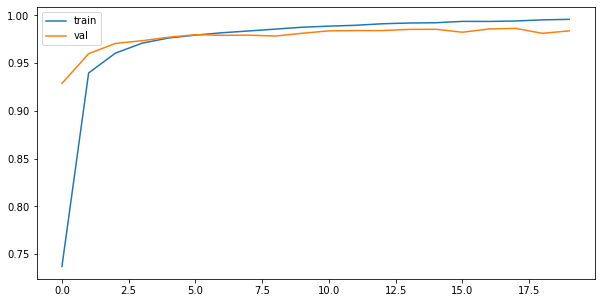

In [47]:
plt.figure(figsize=(10,5)) #가로,세로
plt.plot(history.history['accuracy'], label = 'train') # 훈련용 데이터로 평가한 점수
plt.plot(history.history['val_accuracy'], label= 'val') # 검증용 데이터로 평가한 점수
plt.legend()
plt.show()

In [49]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0523 - accuracy: 0.9852


[0.05228261192283826, 0.9852]